# Cause of Death in the United States.

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import warnings
warnings.filterwarnings('ignore')
import pycountry
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df=pd.read_csv('causes-of-death.csv')
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


## Getting to understand the table

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10868 non-null  int64  
 1   113 Cause Name           10868 non-null  object 
 2   Cause Name               10868 non-null  object 
 3   State                    10868 non-null  object 
 4   Deaths                   10868 non-null  int64  
 5   Age-adjusted Death Rate  10868 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB


As it is seen, there are no null entries in the table!


Let's check for the duplicate entries.

In [289]:
df.duplicated().sum()

0

There are no duplicate entries as well! So far we don't need to do data cleaning.

But here Column 113 Cause Name is not required in the project and hence will be dropped.

In [290]:
df1=df.drop('113 Cause Name', axis=1)
df1

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,Unintentional injuries,United States,169936,49.4
1,2017,Unintentional injuries,Alabama,2703,53.8
2,2017,Unintentional injuries,Alaska,436,63.7
3,2017,Unintentional injuries,Arizona,4184,56.2
4,2017,Unintentional injuries,Arkansas,1625,51.8
...,...,...,...,...,...
10863,1999,Kidney disease,Virginia,1035,16.9
10864,1999,Kidney disease,Washington,278,5.2
10865,1999,Kidney disease,West Virginia,345,16.4
10866,1999,Kidney disease,Wisconsin,677,11.9


# Trends of Causes of Death in the United States

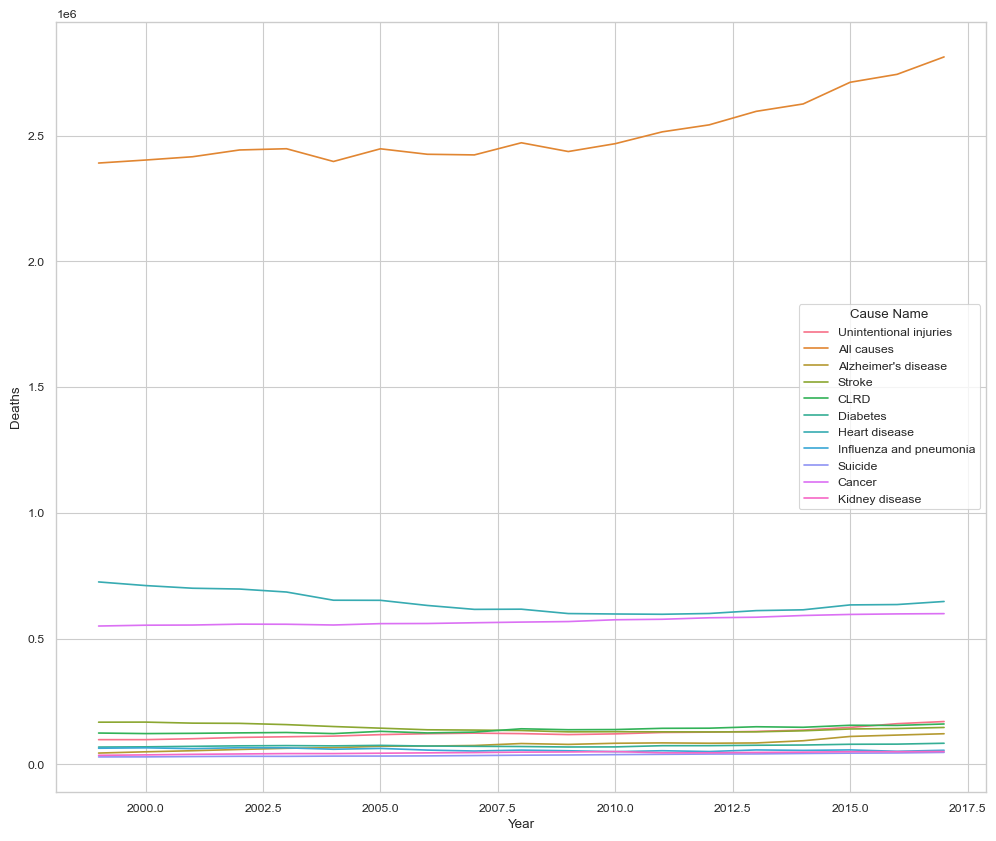

In [291]:
plt.figure(figsize=(12,10))
sns.lineplot(data=df1[df1['State']=='United States'],x='Year',y='Deaths',hue='Cause Name');

This graph shows a graphical representation of trends of Causes of Deaths in the United States.

## Let's visualise this in the form of pie-chart for the year 1999 and 2017

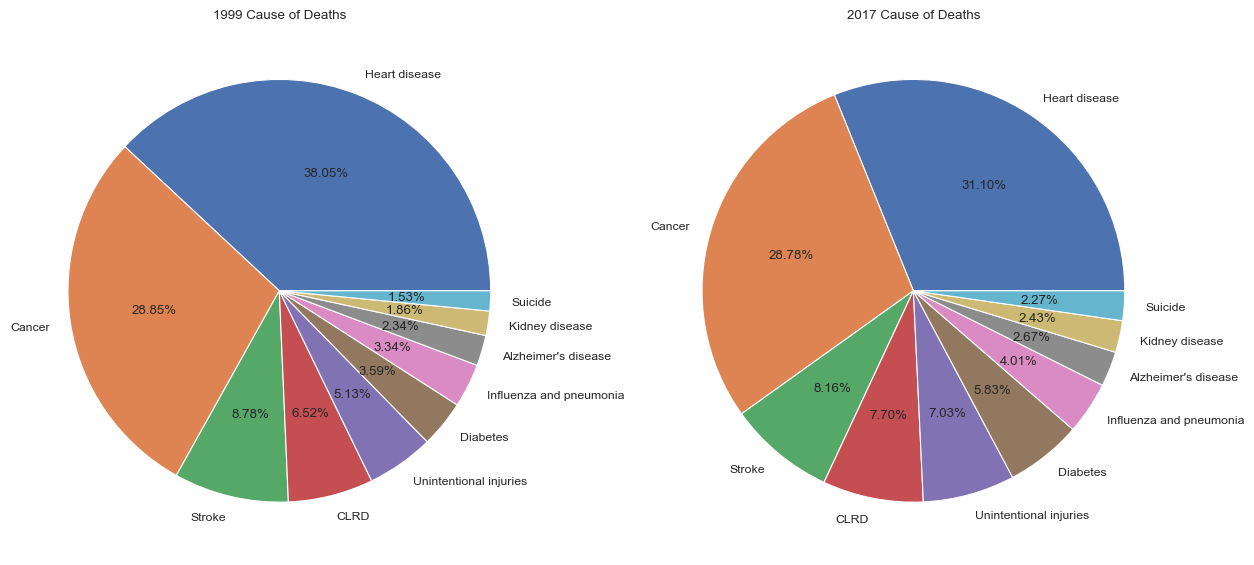

In [292]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
disease=['Heart disease', 'Cancer', 'Stroke', 'CLRD','Unintentional injuries', 'Diabetes', 'Influenza and pneumonia', "Alzheimer's disease", 'Kidney disease', 'Suicide']
ax1.pie(df1[(df1['State']=='United States') & (df1['Year']==1999)].sort_values(by='Deaths', ascending=False)[1:]['Deaths'],autopct="%.2f%%",labels=disease)
ax2.pie(df1[(df1['State']=='United States') & (df1['Year']==2017)].sort_values(by='Deaths', ascending=False)[1:]['Deaths'],autopct="%.2f%%",labels=disease)
ax1.set_title("1999 Cause of Deaths")
ax2.set_title("2017 Cause of Deaths")
plt.show();

Let's take a look!
- Cancer and Stroke is almost the same throuhout the years.
- Heart Disease has dropped by 7%
- There is a significant increase in Suicide, Kidney Disease, Influenza and Pneumonia, Unintentional Injuries, CLRD.

# Mapping deaths on the US Map

In [293]:
df1_states=df1[df1['State']!='United States'].sort_values(by=['Year'])
df1_states[df1_states['Cause Name']=='All causes'].head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
10362,1999,All causes,Illinois,108436,905.1
10361,1999,All causes,Idaho,9579,825.2
10360,1999,All causes,Hawaii,8270,688.8
10359,1999,All causes,Georgia,62028,964.9
10358,1999,All causes,Florida,163224,812.8


For this section we do not need deaths in all of the United States so we neglected that here.

## To map deaths in USA we use pycountry and for that we need state codes.

In [294]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}
df1_states['Code']=df1_states['State'].map(code)
df1_states.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,Code
10867,1999,Kidney disease,Wyoming,30,6.8,WY
10475,1999,Stroke,Minnesota,2997,59.6,MN
10476,1999,Stroke,Mississippi,1854,69.2,MS
10477,1999,Stroke,Missouri,3950,65.6,MO
10478,1999,Stroke,Montana,595,62.2,MT


## Plotting number of deaths on the US Map

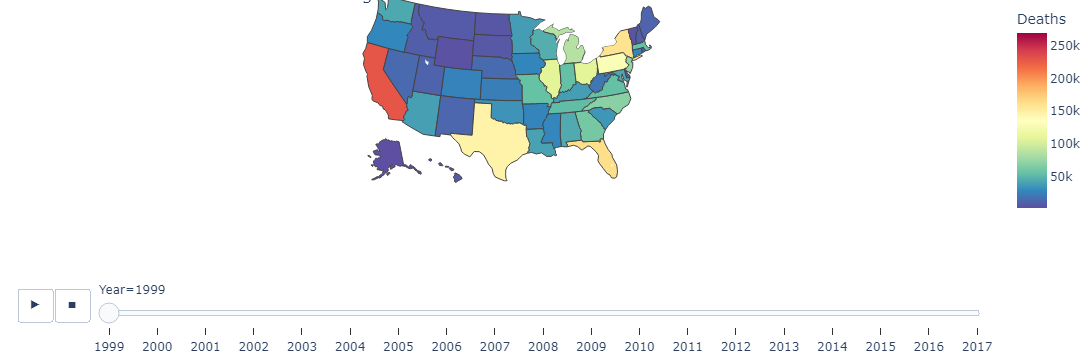

In [295]:
fig = px.choropleth(df1_states[df1_states['Cause Name'] == 'All causes'],
                    locations='Code',
                    color='Deaths',
                    color_continuous_scale='spectral_r',
                    hover_name='State',
                    locationmode='USA-states',
                    range_color=(2500, 270000),
                    animation_frame='Year',
                    title='Number Of Deaths in the USA through 1999 to 2017',
                    scope='usa')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# CASE STUDY - CALIFORNIA STATE

In [296]:
df1_cali=df1_states[df1_states['State'] == 'California']
df1_cali.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,Code
10456,1999,Stroke,California,17962,64.5,CA
10508,1999,CLRD,California,13165,46.9,CA
10560,1999,Diabetes,California,6401,22.5,CA
10353,1999,All causes,California,229380,802.3,CA
10300,1999,Unintentional injuries,California,9198,28.7,CA


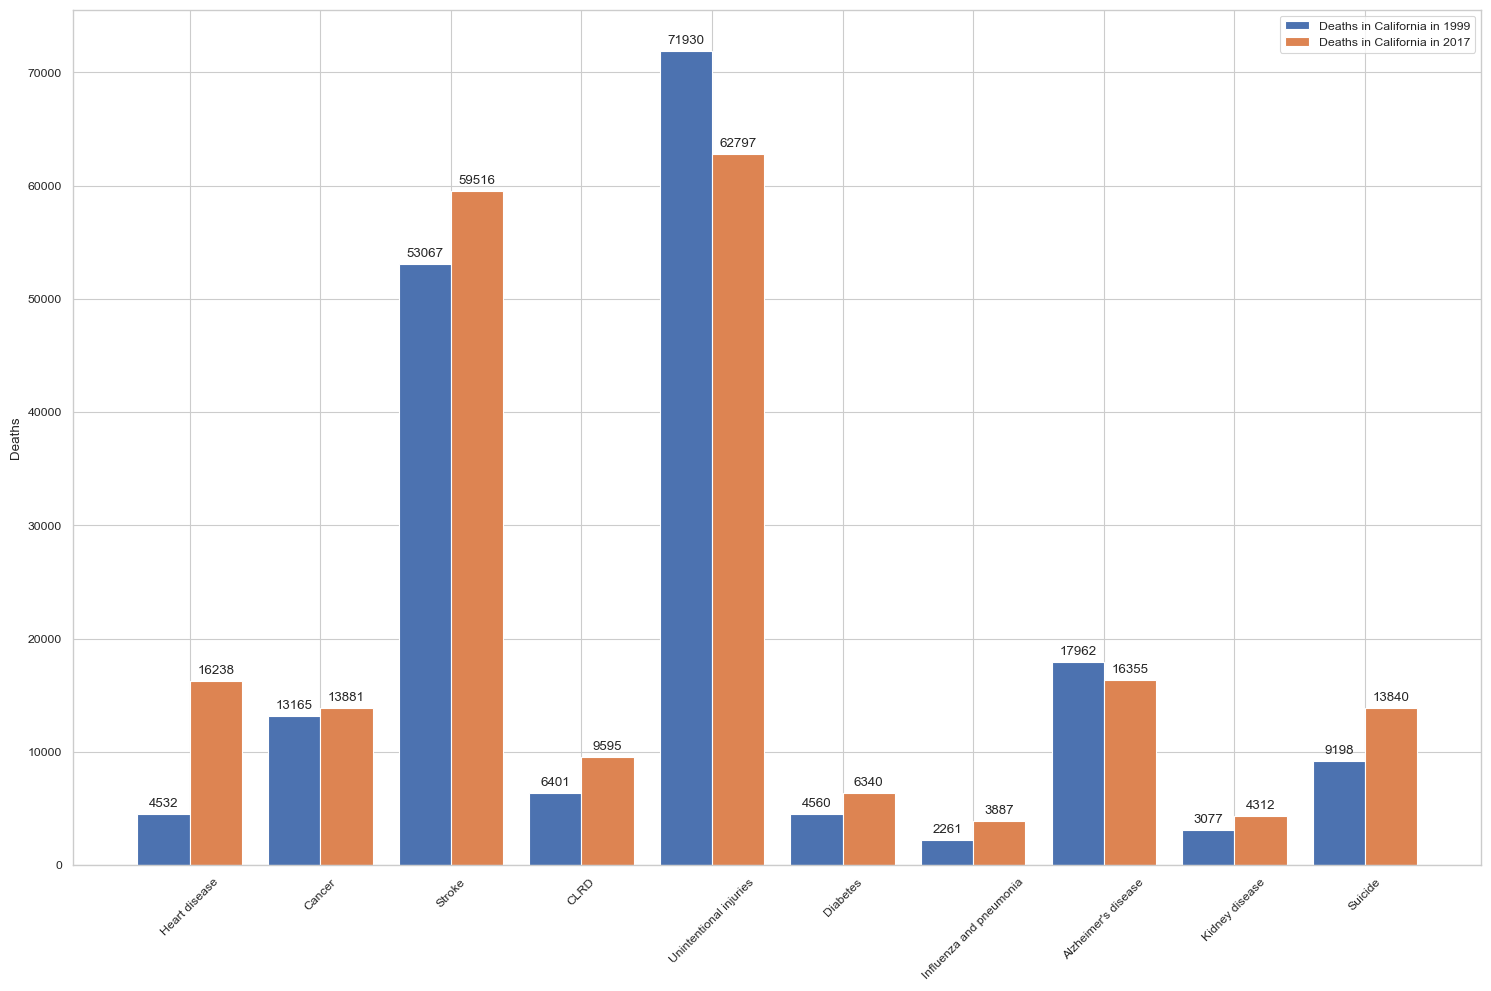

In [297]:
y1 = df1_cali[(df1_cali['Year'] == 1999) & (df1_cali['Cause Name'] != 'All causes')].sort_values(by='Cause Name', ascending=True)['Deaths']
y2 = df1_cali[(df1_cali['Year'] == 2017) & (df1_cali['Cause Name'] != 'All causes')].sort_values(by='Cause Name', ascending=True)['Deaths']
x = np.arange(len(disease))
width = 0.4

fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, y1, width, label='Deaths in California in 1999')
rects2 = ax.bar(x + width/2, y2, width, label='Deaths in California in 2017')

ax.set_ylabel('Deaths')
ax.set_xticks(x)  # Set x-ticks without labels, you'll set labels next.
ax.set_xticklabels(disease, rotation=45)  # Set the labels and rotation.
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


Here, as we can see heart diseases and stroke have decreased overtime but all other diseases have increased over 18 years!

# Clustering

## Cluster based on Heart Disease in the United States for the year 2017

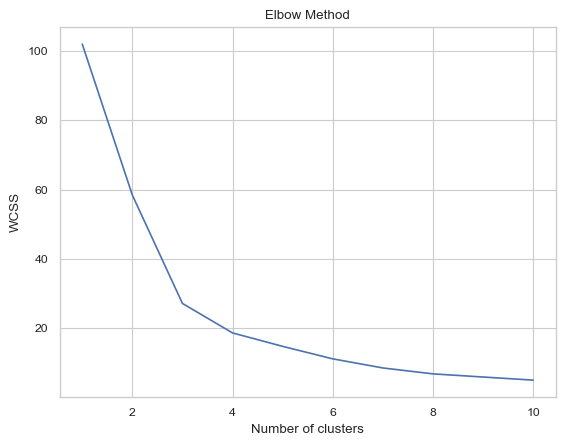

In [298]:
df1_hd=df1_states[(df1_states['Cause Name']=='Heart disease') & (df1_states['Year']== 2017)]
df1_hd_numerical=df1_hd.drop(['Cause Name', 'State', 'Code'], axis=1)
df1_hd_numerical.head()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1_hd_numerical)

wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

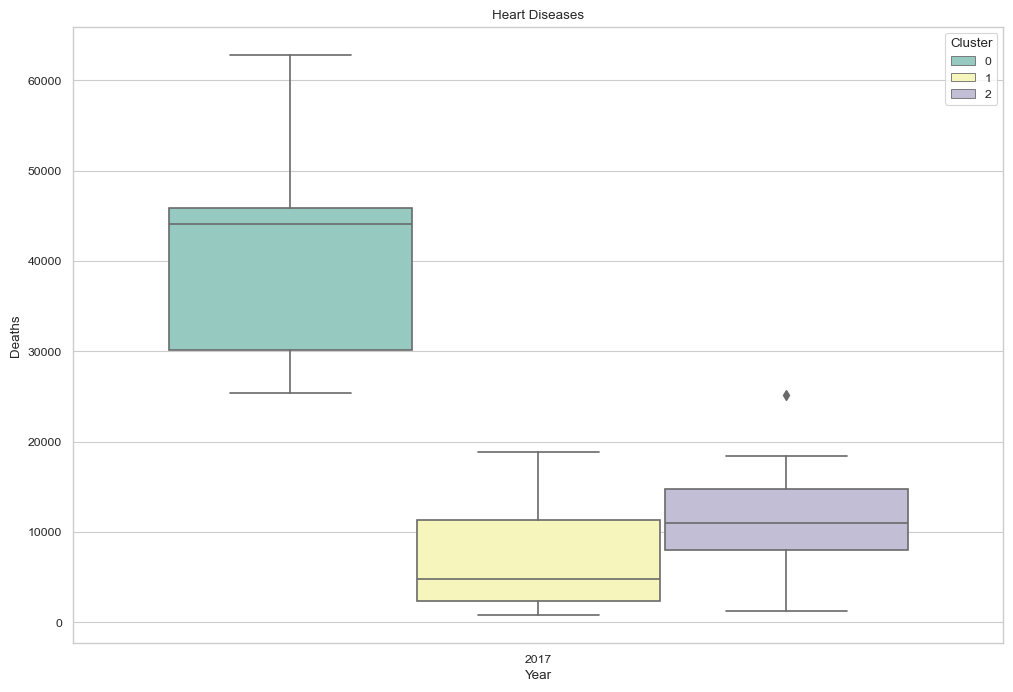

Silhouette Score: 0.543030073897613
Cluster 0 States: Illinois, Pennsylvania, Ohio, New York, Florida, California, Texas
Cluster 1 States: Hawaii, Idaho, Iowa, Kansas, Maine, Maryland, Massachusetts, Minnesota, Montana, Nebraska, South Dakota, South Carolina, Rhode Island, Oregon, North Carolina, New Mexico, New Jersey, New Hampshire, North Dakota, Delaware, Connecticut, Colorado, Arizona, Alaska, Utah, Vermont, Wyoming, Wisconsin, Washington, Virginia
Cluster 2 States: Indiana, Kentucky, Louisiana, Michigan, Mississippi, Missouri, Oklahoma, Georgia, Nevada, Tennessee, Arkansas, District of Columbia, Alabama, West Virginia


In [299]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)

df1_hd['Cluster'] = kmeans.labels_
sns.set(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Deaths', hue='Cluster', data=df1_hd, palette="Set3")
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Heart Diseases')
plt.legend(title='Cluster')
plt.show()
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")
for cluster in range(k):
    cluster_states = df1_hd[df1_hd['Cluster'] == cluster]['State'].tolist()
    print(f'Cluster {cluster} States: {", ".join(cluster_states)}')

## Cluster based on Cancer in the United States for the year 2017

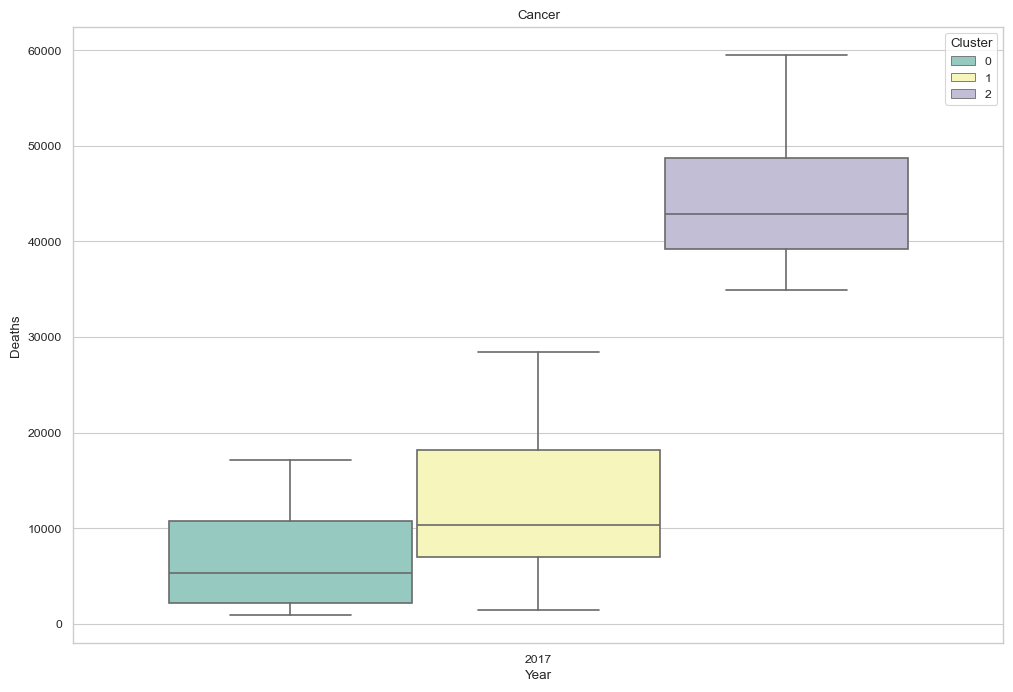

Silhouette Score: 0.44383306344806656
Cluster 0 States: Alaska, Arizona, Colorado, Connecticut, Delaware, District of Columbia, Georgia, Hawaii, Idaho, Iowa, Kansas, New Jersey, New Hampshire, Nevada, Nebraska, Montana, Massachusetts, Maryland, Minnesota, New Mexico, North Dakota, Washington, Virginia, Utah, Wisconsin, Rhode Island, Oregon, South Dakota, Wyoming
Cluster 1 States: Alabama, Arkansas, Illinois, Indiana, Missouri, Mississippi, Michigan, Maine, Louisiana, Kentucky, North Carolina, West Virginia, Vermont, Tennessee, South Carolina, Pennsylvania, Oklahoma, Ohio
Cluster 2 States: California, Florida, New York, Texas


In [300]:
df1_c=df1_states[(df1_states['Cause Name']=='Cancer') & (df1_states['Year']== 2017)]
df1_c_numerical=df1_c.drop(['Cause Name', 'State', 'Code'], axis=1)
df1_c_numerical.head()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1_c_numerical)
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)

df1_c['Cluster'] = kmeans.labels_
sns.set(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Deaths', hue='Cluster', data=df1_c, palette="Set3")
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Cancer')
plt.legend(title='Cluster')
plt.show()
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")
for cluster in range(k):
    cluster_states = df1_c[df1_c['Cluster'] == cluster]['State'].tolist()
    print(f'Cluster {cluster} States: {", ".join(cluster_states)}')

## Cluster based on Stroke in the United States for the year 2017

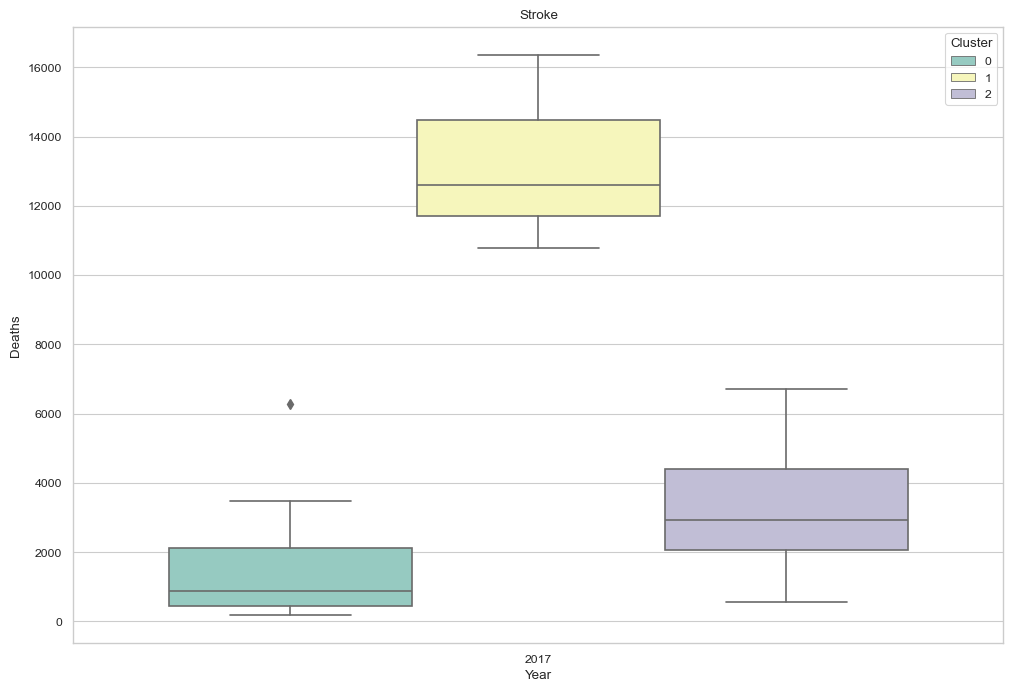

Silhouette Score: 0.4598380237558674
Cluster 0 States: North Dakota, New York, New Jersey, New Hampshire, Nevada, Nebraska, Montana, New Mexico, Vermont, Rhode Island, Minnesota, Wyoming, Wisconsin, Utah, South Dakota, Washington, Colorado, Alaska, Arizona, Maine, Kansas, Iowa, Massachusetts, Hawaii, District of Columbia, Connecticut, Idaho
Cluster 1 States: Texas, California, Florida
Cluster 2 States: Oklahoma, Ohio, North Carolina, Mississippi, Missouri, Oregon, Pennsylvania, West Virginia, Virginia, Tennessee, South Carolina, Michigan, Maryland, Alabama, Arkansas, Louisiana, Kentucky, Indiana, Illinois, Georgia, Delaware


In [301]:
df1_s=df1_states[(df1_states['Cause Name']=='Stroke') & (df1_states['Year']== 2017)]
df1_s_numerical=df1_s.drop(['Cause Name', 'State', 'Code'], axis=1)
df1_s_numerical.head()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1_s_numerical)
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)

df1_s['Cluster'] = kmeans.labels_
sns.set(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Deaths', hue='Cluster', data=df1_s, palette="Set3")
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Stroke')
plt.legend(title='Cluster')
plt.show()
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")
for cluster in range(k):
    cluster_states = df1_s[df1_s['Cluster'] == cluster]['State'].tolist()
    print(f'Cluster {cluster} States: {", ".join(cluster_states)}')

## Cluster based on CLRD in the United States for the year 2017

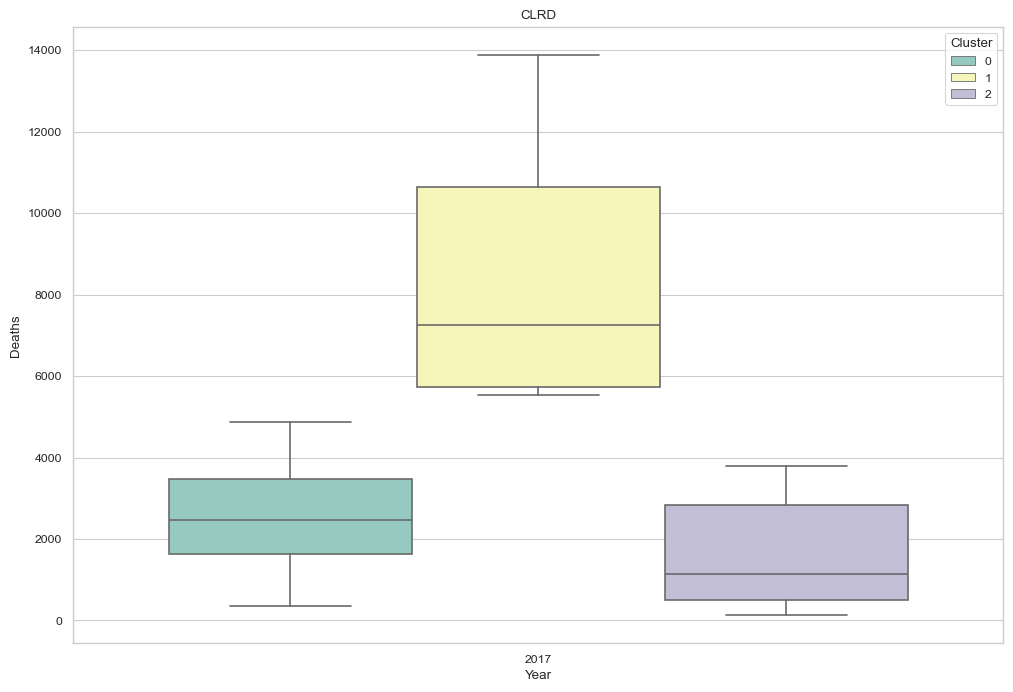

Silhouette Score: 0.3990975668444444
Cluster 0 States: Alabama, Arkansas, Colorado, Tennessee, West Virginia, Wyoming, South Carolina, Maine, Louisiana, Kentucky, Kansas, Iowa, Indiana, Georgia, Idaho, Oklahoma, Nevada, Nebraska, Montana, Missouri, Mississippi
Cluster 1 States: Texas, Pennsylvania, Illinois, Florida, California, Ohio, North Carolina, New York, Michigan
Cluster 2 States: Arizona, Alaska, Utah, Vermont, Virginia, Washington, Wisconsin, South Dakota, Rhode Island, Maryland, Hawaii, District of Columbia, Delaware, Connecticut, Massachusetts, Minnesota, Oregon, North Dakota, New Mexico, New Hampshire, New Jersey


In [302]:
df1_cl=df1_states[(df1_states['Cause Name']=='CLRD') & (df1_states['Year']== 2017)]
df1_cl_numerical=df1_cl.drop(['Cause Name', 'State', 'Code'], axis=1)
df1_cl_numerical.head()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1_cl_numerical)
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)

df1_cl['Cluster'] = kmeans.labels_
sns.set(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Deaths', hue='Cluster', data=df1_cl, palette="Set3")
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('CLRD')
plt.legend(title='Cluster')
plt.show()
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")
for cluster in range(k):
    cluster_states = df1_cl[df1_cl['Cluster'] == cluster]['State'].tolist()
    print(f'Cluster {cluster} States: {", ".join(cluster_states)}')

## Cluster based on Unitentional Injuries in the United States for the year 2017

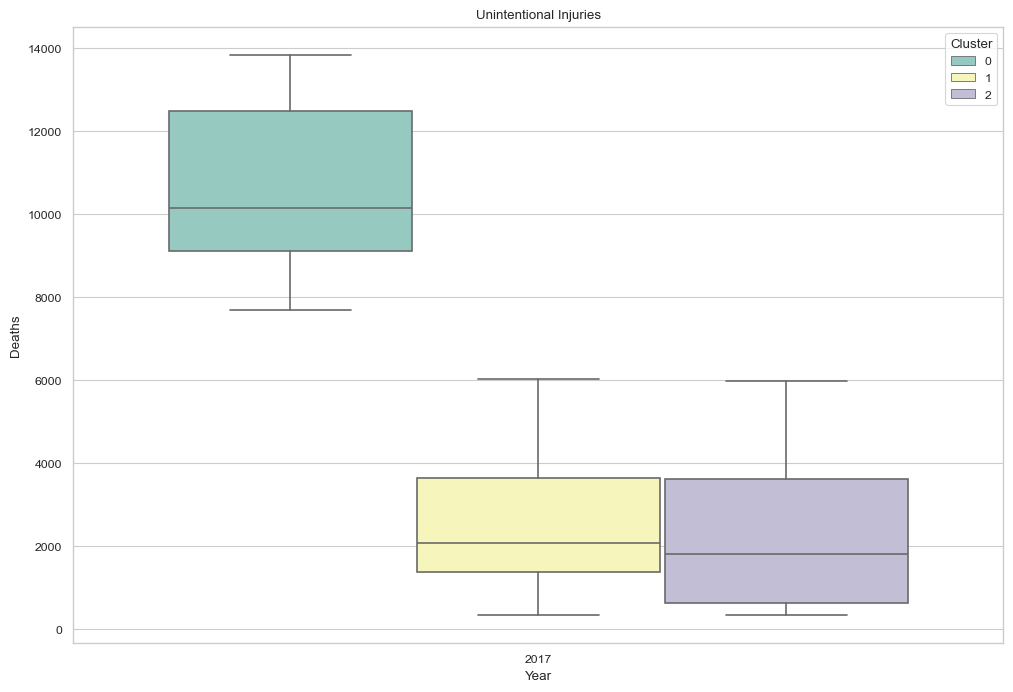

Silhouette Score: 0.34399721905691794
Cluster 0 States: Ohio, Pennsylvania, Texas, California, Florida, New York
Cluster 1 States: Oregon, Utah, Virginia, Washington, North Dakota, Arkansas, Colorado, Connecticut, Georgia, Hawaii, Idaho, Illinois, Iowa, Kansas, New Jersey, Nevada, Nebraska, Montana, Michigan, Massachusetts, Maryland, Minnesota, Alabama
Cluster 2 States: Oklahoma, Rhode Island, South Carolina, South Dakota, Tennessee, Vermont, West Virginia, Wisconsin, Wyoming, North Carolina, New Mexico, Alaska, Arizona, Delaware, District of Columbia, Indiana, New Hampshire, Missouri, Mississippi, Maine, Louisiana, Kentucky


In [303]:
df1_ui=df1_states[(df1_states['Cause Name']=='Unintentional injuries') & (df1_states['Year']== 2017)]
df1_ui_numerical=df1_ui.drop(['Cause Name', 'State', 'Code'], axis=1)
df1_ui_numerical.head()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1_ui_numerical)
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)

df1_ui['Cluster'] = kmeans.labels_
sns.set(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Deaths', hue='Cluster', data=df1_ui, palette="Set3")
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Unintentional Injuries')
plt.legend(title='Cluster')
plt.show()
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")
for cluster in range(k):
    cluster_states = df1_ui[df1_ui['Cluster'] == cluster]['State'].tolist()
    print(f'Cluster {cluster} States: {", ".join(cluster_states)}')

## Cluster based on Diabetes in the United States for the year 2017

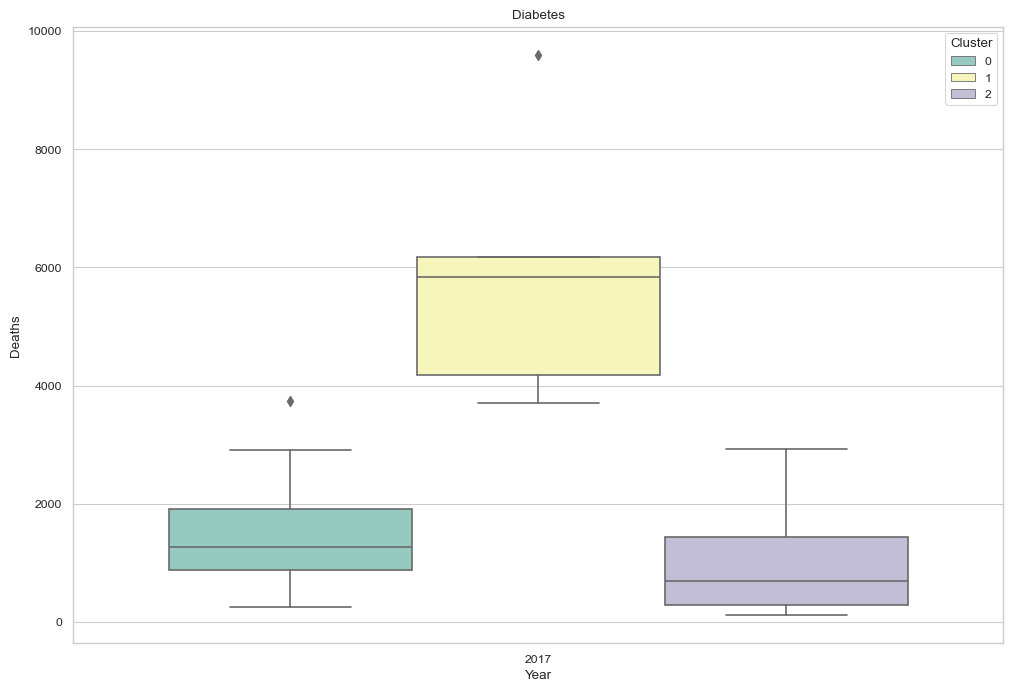

Silhouette Score: 0.43264482064548815
Cluster 0 States: Arizona, Arkansas, Louisiana, Kentucky, Kansas, Indiana, Mississippi, Nebraska, New Mexico, North Carolina, Ohio, Oklahoma, Oregon, South Carolina, South Dakota, Tennessee, West Virginia
Cluster 1 States: California, Florida, New York, Pennsylvania, Texas
Cluster 2 States: Michigan, Alabama, Alaska, Colorado, Connecticut, Delaware, Massachusetts, Maryland, Maine, Iowa, Illinois, Idaho, Hawaii, Georgia, District of Columbia, Minnesota, Montana, Missouri, Nevada, New Hampshire, New Jersey, North Dakota, Rhode Island, Wisconsin, Washington, Virginia, Vermont, Utah, Wyoming


In [304]:
df1_d=df1_states[(df1_states['Cause Name']=='Diabetes') & (df1_states['Year']== 2017)]
df1_d_numerical=df1_d.drop(['Cause Name', 'State', 'Code'], axis=1)
df1_d_numerical.head()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1_d_numerical)
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)

df1_d['Cluster'] = kmeans.labels_
sns.set(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Deaths', hue='Cluster', data=df1_d, palette="Set3")
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Diabetes')
plt.legend(title='Cluster')
plt.show()
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")
for cluster in range(k):
    cluster_states = df1_d[df1_d['Cluster'] == cluster]['State'].tolist()
    print(f'Cluster {cluster} States: {", ".join(cluster_states)}')

## Cluster based on Influenza and Pneumonia in the United States for the year 2017

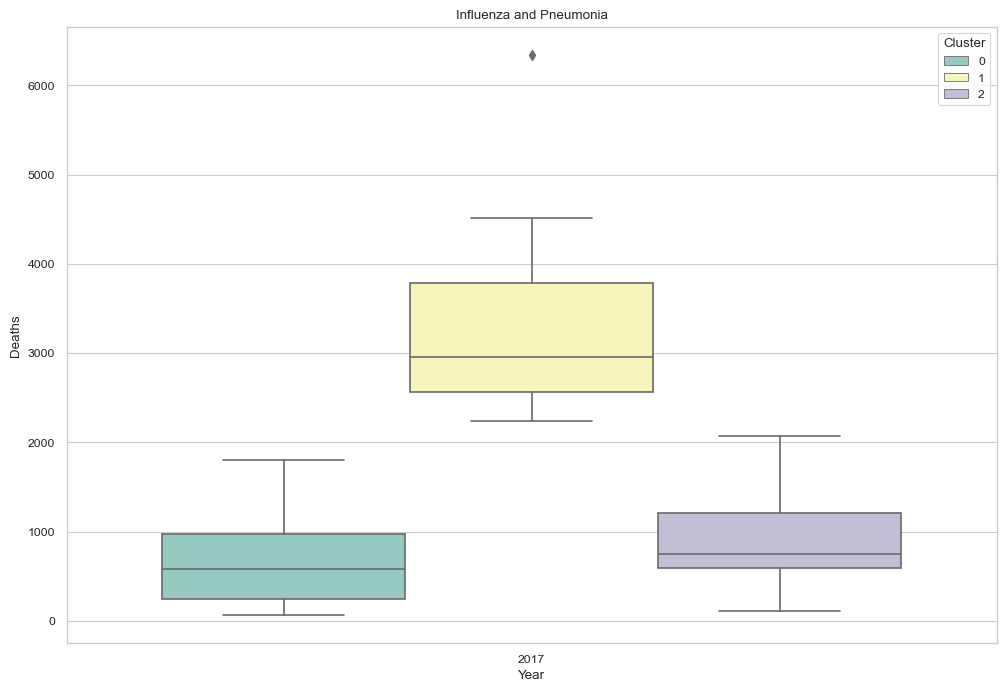

Silhouette Score: 0.48370714050877067
Cluster 0 States: New Mexico, North Dakota, Oklahoma, Oregon, Rhode Island, South Carolina, Utah, Vermont, Virginia, Washington, New Jersey, Wisconsin, New Hampshire, Nebraska, District of Columbia, Delaware, Connecticut, Colorado, Arizona, Alaska, Georgia, Idaho, Montana, Minnesota, Michigan, Massachusetts, Maryland, Louisiana, Kansas, Iowa, Indiana, Maine
Cluster 1 States: New York, Ohio, Pennsylvania, Texas, California, Florida, Illinois
Cluster 2 States: North Carolina, South Dakota, Tennessee, Wyoming, West Virginia, Nevada, Arkansas, Alabama, Missouri, Mississippi, Hawaii, Kentucky


In [305]:
df1_ip=df1_states[(df1_states['Cause Name']=='Influenza and pneumonia') & (df1_states['Year']== 2017)]
df1_ip_numerical=df1_ip.drop(['Cause Name', 'State', 'Code'], axis=1)
df1_ip_numerical.head()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1_ip_numerical)
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)

df1_ip['Cluster'] = kmeans.labels_
sns.set(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Deaths', hue='Cluster', data=df1_ip, palette="Set3")
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Influenza and Pneumonia')
plt.legend(title='Cluster')
plt.show()
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")
for cluster in range(k):
    cluster_states = df1_ip[df1_ip['Cluster'] == cluster]['State'].tolist()
    print(f'Cluster {cluster} States: {", ".join(cluster_states)}')

## Cluster based on Alzheimer's Disease in the United States for the year 2017

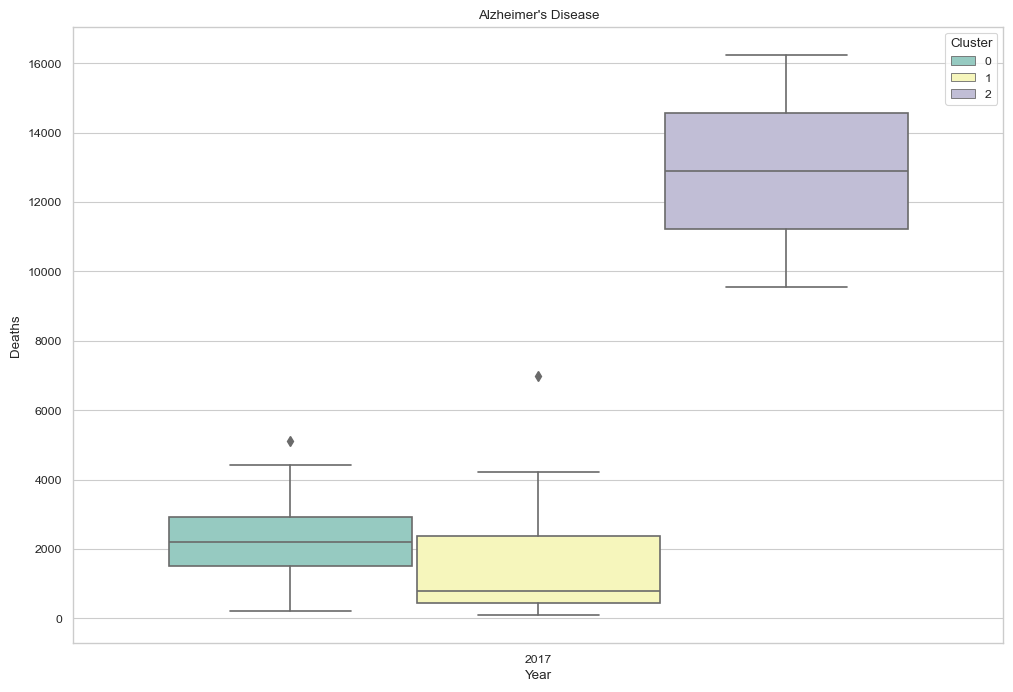

Silhouette Score: 0.4482817702076003
Cluster 0 States: South Carolina, South Dakota, Tennessee, Utah, Vermont, Washington, Wisconsin, Wyoming, Oklahoma, Colorado, Georgia, Idaho, Indiana, Iowa, Kentucky, Louisiana, Ohio, North Dakota, North Carolina, Missouri, Mississippi, Minnesota, Michigan, Arkansas, Arizona, Oregon, Alabama
Cluster 1 States: Rhode Island, Virginia, West Virginia, Pennsylvania, Connecticut, Delaware, District of Columbia, Florida, Hawaii, Illinois, Kansas, Maine, Maryland, Massachusetts, New York, New Mexico, New Jersey, New Hampshire, Nebraska, Montana, Nevada, Alaska
Cluster 2 States: Texas, California


In [306]:
df1_ad=df1_states[(df1_states['Cause Name']=="Alzheimer's disease") & (df1_states['Year']== 2017)]
df1_ad_numerical=df1_ad.drop(['Cause Name', 'State', 'Code'], axis=1)
df1_ad_numerical.head()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1_ad_numerical)
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)

df1_ad['Cluster'] = kmeans.labels_
sns.set(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Deaths', hue='Cluster', data=df1_ad, palette="Set3")
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title("Alzheimer's Disease")
plt.legend(title='Cluster')
plt.show()
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")
for cluster in range(k):
    cluster_states = df1_ad[df1_ad['Cluster'] == cluster]['State'].tolist()
    print(f'Cluster {cluster} States: {", ".join(cluster_states)}')

## Cluster based on Kidney Disease in the United States for the year 2017

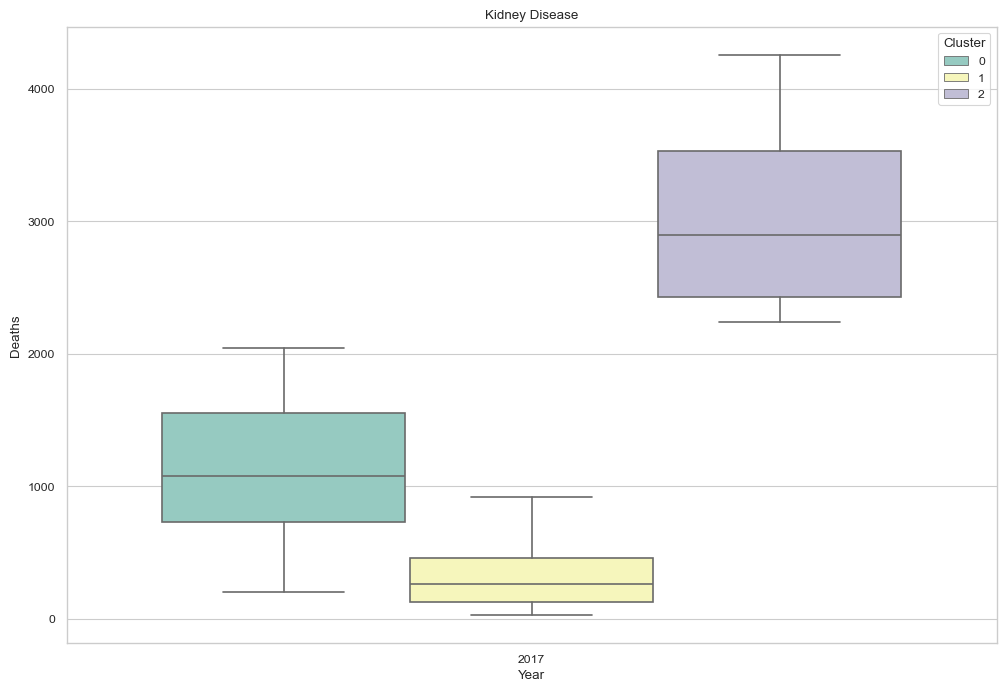

Silhouette Score: 0.4979360447645047
Cluster 0 States: Massachusetts, Michigan, Mississippi, Missouri, New Jersey, North Carolina, West Virginia, Virginia, Utah, Tennessee, South Carolina, Louisiana, Kentucky, Kansas, Indiana, Georgia, Alabama, Delaware, Arkansas
Cluster 1 States: Maryland, Minnesota, Montana, Nebraska, Nevada, New Hampshire, New Mexico, North Dakota, Oklahoma, Wyoming, Wisconsin, Washington, Vermont, Maine, South Dakota, Rhode Island, Oregon, Alaska, Iowa, Idaho, Hawaii, Connecticut, Colorado, Arizona, District of Columbia
Cluster 2 States: New York, Ohio, Pennsylvania, Texas, Illinois, Florida, California


In [307]:
df1_k=df1_states[(df1_states['Cause Name']=="Kidney disease") & (df1_states['Year']== 2017)]
df1_k_numerical=df1_k.drop(['Cause Name', 'State', 'Code'], axis=1)
df1_k_numerical.head()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1_k_numerical)
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)

df1_k['Cluster'] = kmeans.labels_
sns.set(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Deaths', hue='Cluster', data=df1_k, palette="Set3")
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title("Kidney Disease")
plt.legend(title='Cluster')
plt.show()
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")
for cluster in range(k):
    cluster_states = df1_k[df1_k['Cluster'] == cluster]['State'].tolist()
    print(f'Cluster {cluster} States: {", ".join(cluster_states)}')

## Cluster based on Suicide disease in the United States for the year 2017

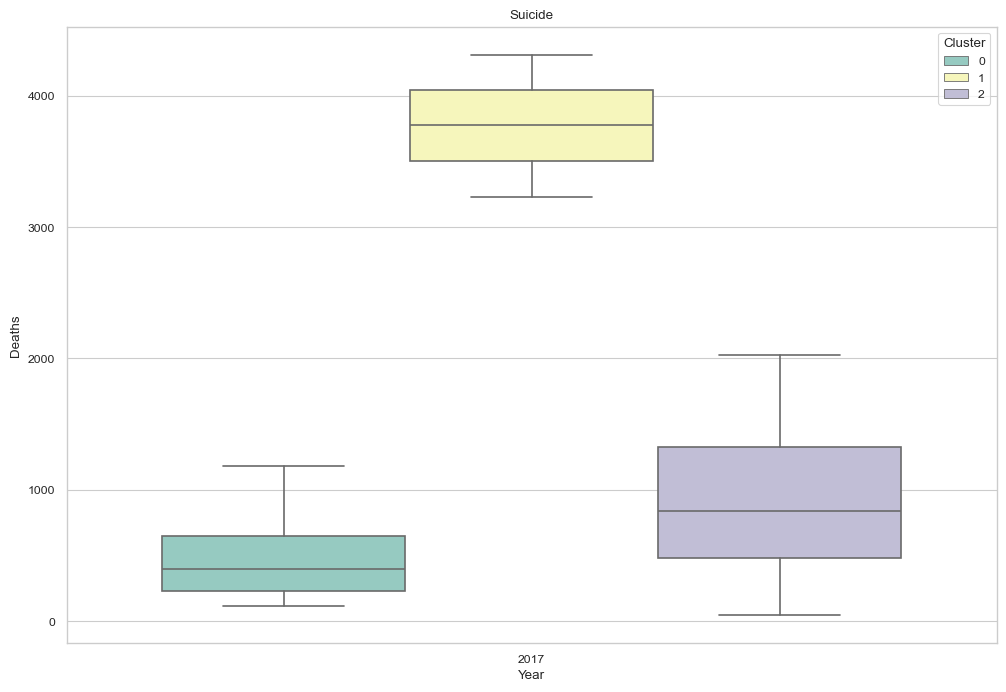

Silhouette Score: 0.43272377572044246
Cluster 0 States: Idaho, Wyoming, Kansas, Maine, Missouri, Montana, Nevada, New Hampshire, New Mexico, Vermont, Utah, South Dakota, West Virginia, Oregon, Oklahoma, North Dakota, Colorado, Alaska, Arkansas
Cluster 1 States: Texas, Florida, California
Cluster 2 States: Wisconsin, Washington, Kentucky, Louisiana, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Nebraska, New Jersey, New York, Virginia, Tennessee, South Carolina, Pennsylvania, Ohio, North Carolina, Rhode Island, Iowa, Indiana, Hawaii, Georgia, District of Columbia, Delaware, Connecticut, Arizona, Alabama, Illinois


In [308]:
df1_sc=df1_states[(df1_states['Cause Name']=="Suicide") & (df1_states['Year']== 2017)]
df1_sc_numerical=df1_sc.drop(['Cause Name', 'State', 'Code'], axis=1)
df1_sc_numerical.head()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1_sc_numerical)
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)

df1_sc['Cluster'] = kmeans.labels_
sns.set(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Deaths', hue='Cluster', data=df1_sc, palette="Set3")
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title("Suicide")
plt.legend(title='Cluster')
plt.show()
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")
for cluster in range(k):
    cluster_states = df1_sc[df1_sc['Cluster'] == cluster]['State'].tolist()
    print(f'Cluster {cluster} States: {", ".join(cluster_states)}')